In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import math

from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords   
import pprint
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie
import matplotlib.pyplot as plt

In [2]:
import glob

# Text Summarization Using TF-IDF

##### Tf=No of times term appears in document/Total terms in document Idf=log_e(Total number of documents / Number of documents with term in it)

### Creating frequency matrix for each word

In [3]:
def _create_frequency_matrix(sentences):
    frequency_matrix = {}
    stopWords = set(stopwords.words("english"))
    ps = PorterStemmer()
    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table

    return frequency_matrix

### Calculating Term Frequency

In [4]:
def _create_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence
            tf_matrix[sent] = tf_table
    return tf_matrix

### Creating table which stores total no of words in a document

In [5]:
def _create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table

### Calculating IDF

In [6]:
def _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

### Calculatin TF-Idf

In [7]:
def _create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

### Giving TF-Idf score to each sentence

In [8]:
def _score_sentences(tf_idf_matrix) -> dict:
    """
    score a sentence by its word's TF
    Basic algorithm: adding the TF frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """

    sentenceValue = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence

    return sentenceValue

### Calculating average sentence score which will be used to decide the threshold

In [9]:
def _find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original summary_text
    if len(sentenceValue)!=0:
        average = (sumValues / len(sentenceValue))
    else:
        average = sumValues
    return average

### Generate summary which includes sentences with score greater than the threshold

In [10]:
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:15] in sentenceValue and sentenceValue[sentence[:15]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1
    return summary

## Main Function

In [11]:
def summary_generator(text):
    # 1 Sentence Tokenize
    sentences = sent_tokenize(text)
    total_documents = len(sentences)
    #print(sentences)

    # 2 Create the Frequency matrix of the words in each sentence.
    freq_matrix = _create_frequency_matrix(sentences)
    #print(freq_matrix)

    # 3 Calculate TermFrequency and generate a matrix
    tf_matrix = _create_tf_matrix(freq_matrix)
    #print(tf_matrix)

    # 4 creating table for documents per words
    count_doc_per_words = _create_documents_per_words(freq_matrix)
    #print(count_doc_per_words)

    # 5 Calculate IDF and generate a matrix
    idf_matrix = _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
    #print(idf_matrix)

    # 6 Calculate TF-IDF and generate a matrix
    tf_idf_matrix = _create_tf_idf_matrix(tf_matrix, idf_matrix)
    #print(tf_idf_matrix)

    # 7 Important Algorithm: score the sentences
    sentence_scores = _score_sentences(tf_idf_matrix)
    #print(sentence_scores)

    # 8 Find the threshold
    threshold = _find_average_score(sentence_scores)
    #print(threshold)

    # 9 Important Algorithm: Generate the summary
    summary = _generate_summary(sentences, sentence_scores,threshold)
    return summary

In [12]:
def printsummary(fileName):
    with open(fileName+".txt", 'r') as maintext:
        maindata = maintext.read().replace('\n', '')
    print(summary_generator(maindata))

In [13]:
import pprint
stopWords=stopwords.words('english')

In [14]:
def cosine_similarityval(summary_list):
    train_set=summary_list
    tfidf_vectorizer = TfidfVectorizer(stop_words=stopWords)
    tfidf_matrix_train = tfidf_vectorizer.fit_transform(train_set)
    return (cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))
    

In [15]:
def showSimilarFiles(folderName,fileName):
    txt_files=glob.glob(folderName+"/*.txt")
    with open(fileName+".txt", 'r') as maintext:
        maindata = maintext.read().replace('\n', '')
    text_list=[]
    text_list.append(maindata)
    for file in txt_files:
        with open(file, 'r') as text:
            data = text.read().replace('\n', '')
        text_list.append(data)
    summary_list=[]
    for text in text_list:
        summary=summary_generator(text)
        summary_list.append(summary)
    finalsimval=cosine_similarityval(summary_list)
    similaritylist={}
    similaritylist[fileName]=finalsimval[0][0]
    i=1
    while i < len(finalsimval[0]):
        similaritylist[txt_files[i-1]]=finalsimval[0][i]
        i=i+1
    finallist=[]
    finallist2=[]
    for i in similaritylist:
        maxel=-1
        key=""
        for j in similaritylist:
            if similaritylist[j]>maxel:
                maxel=similaritylist[j]
                key=j
        finallist2.append(maxel)
        similaritylist[key]=-2
        finallist.append(key)
    fol=len(folderName)
    finallist3=[]
    for i in finallist[1:]:
        print(i)
    for i in finallist[1:]:
        finallist3.append(i[fol+1:])
    matplotlib.pyplot.bar(finallist3,finallist2[1:], width=0.2, bottom=None, align='edge', data=None)

Docs\cow1.txt
Docs\cow4.txt
Docs\tiger2.txt
Docs\elephant.txt
Docs\peacock.txt
Docs\tiger.txt
Docs\women.txt
Docs\pollution.txt


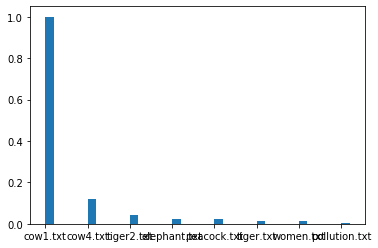

In [16]:
showSimilarFiles("Docs",'cow1')

In [17]:
printsummary('cow1')

 She eats grass, hay, fodder and grains. But she likes to graze green grasses in an open field. We keep cow in a cattle or a shed. In India, she is called as “Gaou Mata”. She has many religious significances for Hindus. They respect her as their mother. But the modern cattle are divided into two breeds. Some have their origin in India and some in Europe. The modern two breeds of cattle are Bos Taurus and Bos Indicus. Bos Taurus:Bos Taurus cattle are also known as Taurine cattle. Bos Indicus:Bos Indicus is also known as Zebus cattle. Her milk is used in various ways. Some people use it as a medicine and some for the religious purposes. Indian Hindus worship her on their festivals.


Docs2\airp.txt
Docs2\airp2.txt
Docs2\noisep.txt
Docs2\soilp.txt
Docs2\waterp.txt


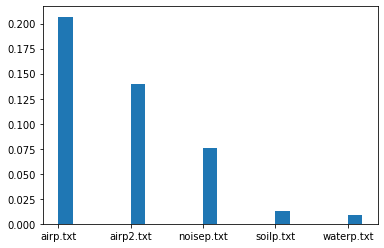

In [18]:
showSimilarFiles("Docs2",'airpmain')

In [19]:
printsummary('news')

 The death of a dream arrived in the most workmanlike city. Fireworks for some, heartburn for others. It must be hard for him to repeat the "better team won" cliche. Not India. How then will he explain the loss to himself? "It is difficult to explain. Here's an apocryphal tale on Rohit, narrated to yours truly by a senior colleague. Rohit asked. "Honestly, it looks really tough," the scribe replied. I work hard to look effortless, he'd say, but few listened. Then 2013 happened. They are the cricketing equivalence of Sufism. He buried his face twice in his arm before cameras shifted their focus. There could be a tear or two too, but no amount of high-resolution lenses will tell you how broken he must be. He has been infuriating, excruciating, endearing, but in pain? Sport does that to you.


In [20]:
len('''The death of a dream arrived in the most workmanlike city. Fireworks for some, heartburn for others. It must be hard for him to repeat the "better team won" cliche. Not India. How then will he explain the loss to himself? "It is difficult to explain. Here's an apocryphal tale on Rohit, narrated to yours truly by a senior colleague. Rohit asked. "Honestly, it looks really tough," the scribe replied. I work hard to look effortless, he'd say, but few listened. Then 2013 happened. They are the cricketing equivalence of Sufism. He buried his face twice in his arm before cameras shifted their focus. There could be a tear or two too, but no amount of high-resolution lenses will tell you how broken he must be. He has been infuriating, excruciating, endearing, but in pain? Sport does that to you.''')

798

In [21]:
len('''The death of a dream arrived in the most workmanlike city. It had to be. The most workmanlike team, in the most workmanlike grind, brought to earth the high-flying princes of the cricketing kingdom on a working Wednesday. At just about 3 PM local time on 10 July, Yuzvendra Chahal swung at James Neesham and edged to the wicketkeeper. As the giant screen spelled out India's fate, the muggy Manchester skies turned a shade gloomier. Fireworks for some, heartburn for others. Almost on cue, the heavens opened up in faraway Mumbai, as if to reinforce that Indian cricket team's high noon had ended. Boy, did it hurt!

Being Virat Kohli must not be easy; at least for now. For someone who has been in unreal form for the past five years, five consecutive losses in the knockout stages of ICC events is a bitter pill to swallow. It must be hard for him to repeat the "better team won" cliche. The "better team" on the days that matter, since 2014, has been Sri Lanka (World T20 final, 2014), Australia (ICC Cricket World Cup semi-final, 2015), West Indies (World T20 semi-final, 2016), Pakistan (Champions Trophy final, 2017), and now New Zealand. Not India. Neither MS Dhoni's India, nor Virat Kohli's India.
Questions will be asked of his decision to hold back Dhoni till No 7. Queries will be posed on team selection, on the elusive No 4 and the unstable No 5, on the middle order muddle that has continued for so long that it's exhausting to even think of it, and on Kohli's own form in knock-out stages of multi-nation ICC events. One is not certain if Kohli will have an answer, or if he has someone who can, as former coach Anil Kumble once famously said, show him the mirror.

Truth be told, Kohli was tactically a much-improved captain at the World Cup. He was relentlessly aggressive in his field placements, his plan to use Jasprit Bumrah in short bursts in the middle overs as a wicket-taking option proved successful, and he was ready to drop one of the wrist spinners when the situation demanded. He did most things right, and while there will be legitimate questions over dropping Kedar Jadhav for the semi-final — Jadhav could have been a sixth bowling option too — one must respect the fact that tactics are a captain's prerogative after all.

Once the dust settles and the flashlights are gone, Kohli will, possibly, look to address some pestering issues head-on, chief among them being the absence of a middle-order core, and the utility of Dhoni in his scheme of things. That's not an easy task.

Kohli was instrumental in encouraging a culture of fearlessness in a team that was increasingly getting passive under Dhoni. His predilection for fast bowlers — remember what he once said about an angry fast bowler being a captain's delight — gave India a mean, intimidating assortment of fast men (who would have thought?), and his faith in wrist spinners went a long way in India becoming a limited-over powerhouse over the past 18 months. How then will he explain the loss to himself? After his fifth heartbreak at an ICC event in five years, he summed up the pain in five words of poise.

"It is difficult to explain."

Surely, it is difficult being Virat Kohli.

Being Rohit Sharma must not be easy either. Here's an apocryphal tale on Rohit, narrated to yours truly by a senior colleague. Sometime before the team for the 2011 World Cup was to be announced, Rohit was fielding at the boundary in (perhaps) an international match when he noticed the said journalist. "What do you think, will I make it to the World Cup squad?" Rohit asked. "Honestly, it looks really tough," the scribe replied. "Right, I think the same too," Rohit is known to have said before resuming his fielding duties.

Rohit, obviously, missed the bus for the 2011 World Cup. That was the time when the curse of talent hung around his neck like an albatross. I work hard to look effortless, he'd say, but few listened. What one saw was languid elegance, boundless talent, and a young man hell-bent on making an awful mess of the two. Then 2013 happened. Dhoni asking Rohit to open must surely rank alongside Sourav Ganguly asking Virender Sehwag to open in Tests, for the results were equally immeasurably, irrevocably, irrationally excellent.

Numbers are a lousy, lazy way to describe what one may call, the Rohit Sharma experience. The clean bat-swing, the ability to pull from the front and back foot and from long on to fine leg, the silken drives and the surreal lofts are experiences of spiritual purity. They are the cricketing equivalence of Sufism. World Cup 2019 saw Rohit amass 648 of the most divine runs, and to think of a nervous youngster asking around for his chances of making it to the World Cup to actually bossing it, Rohit completed a nice little circle. It was impossible not to give in to his allure, the absolute, unmistakable whirlpool of trance.

Images will linger; of him labourously raising his bat after each ton — he did it five times in a space of nine matches — of him joking with the press when players feel it's their duty to diss the media, but there's one particular image that will live to haunt you. That of Rohit standing (languidly, of course) in the Old Trafford balcony, his right hand holding his cap, his folded left arm masking his face. He buried his face twice in his arm before cameras shifted their focus. There could be a tear or two too, but no amount of high-resolution lenses will tell you how broken he must be. On a day he would have liked to lead India's charge, there he was, forlorn, finished, fatigued, calling for a hug. It was difficult enough to watch; imagine being that image.
Talking of troubling images, there'll be one of Dhoni too. Run-out in a moment of sporting theatre in perhaps his last international innings, the man with fastest legs in cricketing universe trudged back defeated and deflated. For the first time in ages, his face flashed an emotion, and it was of pain. Dhoni had failed before, but his countenance had never revealed a thing. He has been infuriating, excruciating, endearing, but in pain? In times like these, we realise the years and range of emotions we have invested in men and women we hardly know. Sport does that to you. Perhaps it is time, and if it is, Dhoni can leave the stage knowing that his legacy is secure in the pantheon of cricket's greatest ever.

Hindsight vision is the closest thing to existential perfection. It's also the swiftest vehicle to honest introspection, and India would do well to look back and look inwards for some answers.

India's journey to this World Cup started with the Sydney surrender in 2015 and gained the turbo charge it needed after the London loss in 2017. Manchester 2019 could be another milestone in this march towards excellence, and there will be some personnel changes along the way. Fresh faces in support staff might be on the way, as could be another batch of batsmen gunning for at least three slots in the brittle middle order. A new crop of fast bowlers ought to be groomed with Bumrah, Bhuvneshar Kumar and Mohammed Shami being the torchbearers of pace. Talents like Vijay Shankar, Rishabh Pant, and Hardik Pandya must be persisted with, and a decent finger spinner, along with Ravindra Jadeja, will do no harm to the team's overall balance.

It's unlikely that the loss will dent the team's confidence, but repeated failures in knock-out matches must be humbly acknowledged and honestly addressed. With the fresh cycle of international cricket set to start in less than a month, the process needs to be set in motion at the earliest. The dream has ended; it's time to wake up to a workmanlike reality.''')

7649

In [22]:
len(''' Causes of climate change
What is the most important cause of climate change?

Human activity is the main cause of climate change. People burn fossil fuels and convert land from forests to agriculture. Since the beginning of the Industrial Revolution, people have burned more and more fossil fuels and changed vast areas of land from forests to farmland.

Burning fossil fuels produces carbon dioxide, a greenhouse gas. It is called a greenhouse gas because it produces a “greenhouse effect”. The greenhouse effect makes the earth warmer, just as a greenhouse is warmer than its surroundings.

Carbon dioxide is the main cause of human-induced climate change.

It stays in the atmosphere for a very long time. Other greenhouse gases, such as nitrous oxide, stay in the atmosphere for a long time. Other substances only produce short-term effects.

Not all substances produce warming. Some, like certain aerosols, can produce cooling.
What are climate forcers?

Carbon dioxide and other substances are referred to as climate forcers because they force or push the climate towards being warmer or cooler. They do this by affecting the flow of energy coming into and leaving the earth’s climate system.

Small changes in the sun’s energy that reaches the earth can cause some climate change. But since the Industrial Revolution, adding greenhouse gases has been over 50 times more powerful than changes in the Sun's radiance. The additional greenhouse gases in earth’s atmosphere have had a strong warming effect on earth’s climate.

Future emissions of greenhouse gases, particularly carbon dioxide, will determine how much more climate warming occurs.
What can be done about climate change?

Carbon dioxide is the main cause of human-induced global warming and associated climate change. It is a very long-lived gas, which means carbon dioxide builds up in the atmosphere with ongoing human emissions and remains in the atmosphere for centuries. Global warming can only be stopped by reducing global emissions of carbon dioxide from human fossil fuel combustion and industrial processes to zero, but even with zero emissions, the global temperature will remain essentially constant at its new warmer level. Emissions of other substances that warm the climate must also be substantially reduced. This indicates how difficult the challenge is.
What is climate change?

Climate change is a long-term shift in weather conditions identified by changes in temperature, precipitation, winds, and other indicators. Climate change can involve both changes in average conditions and changes in variability, including, for example, extreme events.

The earth's climate is naturally variable on all time scales. However, its long-term state and average temperature are regulated by the balance between incoming and outgoing energy, which determines the Earth's energy balance. Any factor that causes a sustained change to the amount of incoming energy or the amount of outgoing energy can lead to climate change. Different factors operate on different time scales, and not all of those factors that have been responsible for changes in earth's climate in the distant past are relevant to contemporary climate change. Factors that cause climate change can be divided into two categories ­- those related to natural processes and those related to human activity. In addition to natural causes of climate change, changes internal to the climate system, such as variations.

In ocean currents or atmospheric circulation, can also influence the climate for short periods of time. This natural internal climate variability is superimposed on the long-term forced climate change.
Does climate change have natural causes?

The Earth's climate can be affected by natural factors that are external to the climate system, such as changes in volcanic activity, solar output, and the Earth's orbit around the Sun. Of these, the two factors relevant on timescales of contemporary climate change are changes in volcanic activity and changes in solar radiation. In terms of the Earth's energy balance, these factors primarily influence the amount of incoming energy. Volcanic eruptions are episodic and have relatively short-term effects on climate. Changes in solar irradiance have contributed to climate trends over the past century but since the Industrial Revolution, the effect of additions of greenhouse gases to the atmosphere has been over 50 times that of changes in the Sun's output.
Human causes

Climate change can also be caused by human activities, such as the burning of fossil fuels and the conversion of land for forestry and agriculture. Since the beginning of the Industrial Revolution, these human influences on the climate system have increased substantially. In addition to other environmental impacts, these activities change the land surface and emit various substances to the atmosphere. These in turn can influence both the amount of incoming energy and the amount of outgoing energy and can have both warming and cooling effects on the climate.  The dominant product of fossil fuel combustion is carbon dioxide, a greenhouse gas. The overall effect of human activities since the Industrial Revolution has been a warming effect, driven primarily by emissions of carbon dioxide and enhanced by emissions of other greenhouse gases.

The build-up of greenhouse gases in the atmosphere has led to an enhancement of the natural greenhouse effect.  It is this human-induced enhancement of the greenhouse effect that is of concern because ongoing emissions of greenhouse gases have the potential to warm the planet to levels that have never been experienced in the history of human civilization. Such climate change could have far-reaching and/or unpredictable environmental, social, and economic consequences.
Short-lived and long-lived climate forcers

Carbon dioxide is the main cause of human-induced climate change. It has been emitted in vast quantities from the burning of fossil fuels and it is a very long-lived gas, which means it continues to affect the climate system during its long residence time in the atmosphere. However, fossil fuel combustion, industrial processes, agriculture, and forestry-related activities emit other substances that also act as climate forcers. Some, such as nitrous oxide, are long-lived greenhouse gases like carbon dioxide, and so contribute to long-term climate change. Other substances have shorter atmospheric lifetimes because they are removed fairly quickly from the atmosphere. Therefore, their effect on the climate system is similarly short-lived. Together, these short-lived climate forcers are responsible for a significant amount of current climate forcing from anthropogenic substances. Some short-lived climate forcers have a climate warming effect (‘positive climate forcers') while others have a cooling effect (‘negative climate forcers').

If atmospheric levels of short-lived climate forcers are continually replenished by ongoing emissions, these continue to exert a climate forcing. However, reducing emissions will quite quickly lead to reduced atmospheric levels of such substances. A number of short-lived climate forcers have climate warming effects and together are the most important contributors to the human enhancement of the greenhouse effect after carbon dioxide. This includes methane and tropospheric ozone – both greenhouse gases – and black carbon, a small solid particle formed from the incomplete combustion of carbon-based fuels (coal, oil and wood for example).

Other short-lived climate forcers have climate cooling effects, most notably sulphate aerosols. Fossil fuel combustion emits sulphur dioxide into the atmosphere (in addition to carbon dioxide) which then combines with water vapour to form tiny droplets (aerosols) which reflect sunlight. Sulphate aerosols remain in the atmosphere for only a few days (washing out in what is referred to as acid rain), and so do not have the same long-term effect as greenhouse gases. The cooling from sulphate aerosols in the atmosphere has, however, offset some of the warming from other substances. That is, the warming we have experienced to date would have been even larger had it not been for elevated levels of sulphate aerosols in the atmosphere.''')

8273

In [23]:
printsummary('causesofclimatechange')

  Causes of climate changeWhat is the most important cause of climate change?Human activity is the main cause of climate change. People burn fossil fuels and convert land from forests to agriculture. Since the beginning of the Industrial Revolution, people have burned more and more fossil fuels and changed vast areas of land from forests to farmland.Burning fossil fuels produces carbon dioxide, a greenhouse gas. It is called a greenhouse gas because it produces a “greenhouse effect”. Other greenhouse gases, such as nitrous oxide, stay in the atmosphere for a long time. Other substances only produce short-term effects.Not all substances produce warming. They do this by affecting the flow of energy coming into and leaving the earth’s climate system.Small changes in the sun’s energy that reaches the earth can cause some climate change. Emissions of other substances that warm the climate must also be substantially reduced. This indicates how difficult the challenge is.What is climate chang

In [24]:
len('''Causes of climate changeWhat is the most important cause of climate change?Human activity is the main cause of climate change. People burn fossil fuels and convert land from forests to agriculture. Since the beginning of the Industrial Revolution, people have burned more and more fossil fuels and changed vast areas of land from forests to farmland.Burning fossil fuels produces carbon dioxide, a greenhouse gas. It is called a greenhouse gas because it produces a “greenhouse effect”. Other greenhouse gases, such as nitrous oxide, stay in the atmosphere for a long time. Other substances only produce short-term effects.Not all substances produce warming. They do this by affecting the flow of energy coming into and leaving the earth’s climate system.Small changes in the sun’s energy that reaches the earth can cause some climate change. Emissions of other substances that warm the climate must also be substantially reduced. This indicates how difficult the challenge is.What is climate change?Climate change is a long-term shift in weather conditions identified by changes in temperature, precipitation, winds, and other indicators. However, its long-term state and average temperature are regulated by the balance between incoming and outgoing energy, which determines the Earth's energy balance. Any factor that causes a sustained change to the amount of incoming energy or the amount of outgoing energy can lead to climate change. Different factors operate on different time scales, and not all of those factors that have been responsible for changes in earth's climate in the distant past are relevant to contemporary climate change. Factors that cause climate change can be divided into two categories ­- those related to natural processes and those related to human activity. Of these, the two factors relevant on timescales of contemporary climate change are changes in volcanic activity and changes in solar radiation. In terms of the Earth's energy balance, these factors primarily influence the amount of incoming energy. Volcanic eruptions are episodic and have relatively short-term effects on climate. Since the beginning of the Industrial Revolution, these human influences on the climate system have increased substantially. These in turn can influence both the amount of incoming energy and the amount of outgoing energy and can have both warming and cooling effects on the climate. Other substances have shorter atmospheric lifetimes because they are removed fairly quickly from the atmosphere. Therefore, their effect on the climate system is similarly short-lived. Together, these short-lived climate forcers are responsible for a significant amount of current climate forcing from anthropogenic substances. However, reducing emissions will quite quickly lead to reduced atmospheric levels of such substances. That is, the warming we have experienced to date would have been even larger had it not been for elevated levels of sulphate aerosols in the atmosphere.''')

2988

Docs2\airp.txt
Docs2\airp2.txt
Docs2\noisep.txt
Docs2\soilp.txt
Docs2\waterp.txt


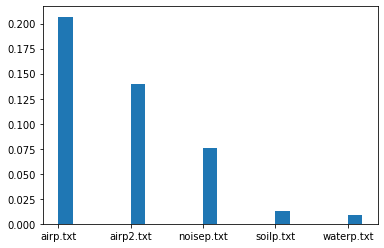

In [25]:
showSimilarFiles('Docs2','airpmain')

Docs\cow1.txt
Docs\cow4.txt
Docs\tiger2.txt
Docs\elephant.txt
Docs\peacock.txt
Docs\tiger.txt
Docs\women.txt
Docs\pollution.txt


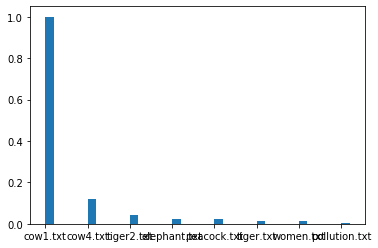

In [26]:
showSimilarFiles('Docs','cow1')